# Volume 4: Introduction to Initial and Boundary Value Problems

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Problem 1
Use `solve_ivp` to solve for $y$ in the equation $y'' - y = sin(t)$ with initial conditions $y(0)= -\frac{1}{2}$, $y'(0) = 0$ and plot your solution on the interval $[0,5]$. Compare this to the analytic solution $y=-\frac{1}{2}(e^{-t}+sin(t))$. 

Note: Using max_step = 0.1 with give you a smoother graph here

In [2]:
def ode(t, y):
    '''defines the ode system'''
    return np.array([y[1],np.sin(t)+y[0]])

# element 2: the time domain
t_span = (0,5)

# element 3: the initial conditions
y0 = np.array([-1 /2, 0])

# solve the system
# max_step is an optional parameter that controls maximum step size and
# a smaller value will result in a smoother graph
sol = solve_ivp(ode, t_span, y0, max_step=0.1)

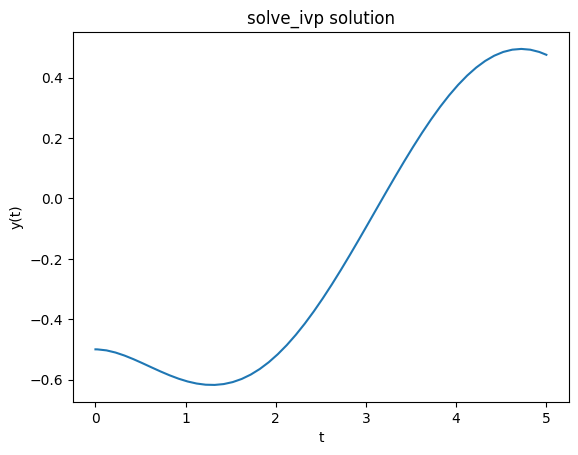

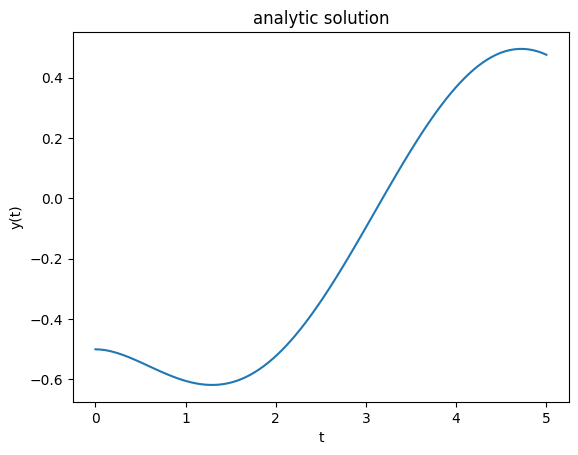

In [3]:
plt.plot(sol.t,sol.y[0])
plt.title("solve_ivp solution")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()
t = np.linspace(0, 5, 100)
plt.plot(t, -.5*(np.exp(-t) + np.sin(t)))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("analytic solution")
plt.show()

### Problem 2

Use `solve_bvp` to solve for $y$ in the equation $y'+y''=-\frac{1}{4}e^{-0.5t}+sin(t)-cos(t)$ with boundary conditions $y(0)=6$ and $y'(5)=-0.324705$ and plot your solution on the interval $[0,5]$. Use an initial guess of all ones. Compare this to the analytic solution $y =e^{-0.5t}-sin(t)+5$. 

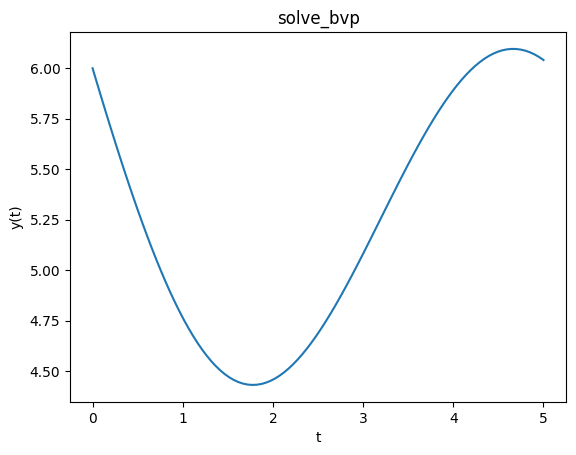

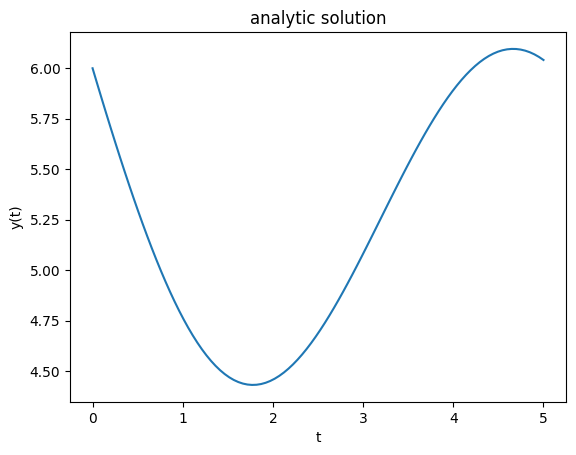

In [12]:
#problem 2: BVP
def ode(t, y):
    return np.array([y[1], -.25*(np.exp(-t/2)) + np.sin(t) -np.cos(t) - y[1]])

def bc(ya,yb):
    ''' define the boundary conditions '''
    # ya are the initial values
    # yb are the final values
    # each entry of the return array will be set to zero
    return np.array([ya[0] - 6, yb[1] + .324705])

# element 3: the time domain.
t_steps = 100
t = np.linspace(0,5,t_steps)
# element 4: the initial guess.
y0 = np.ones((2,t_steps))
# Solve the system.
sol = solve_bvp(ode, bc, t, y0)


# here we plot sol.x instead of sol.t
plt.plot(sol.x, sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("solve_bvp")
plt.show()

# here we plot analytic solution
t = np.linspace(0, 5, 100)
plt.plot(t, (np.exp(-t/2) - np.sin(t) + 5))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title("analytic solution")
plt.show()

### Problem 3

Use `solve_bvp` to solve for $y$ in the equation $y''=(1-y')*10y$ with boundary conditions $y(0)=-1$ and $y(1)=\frac{3}{2}$ and plot your solution on the interval $[0,1]$. Use an initial guess of 10. Compare this to the the same solution using an initial guess of 9.99. 

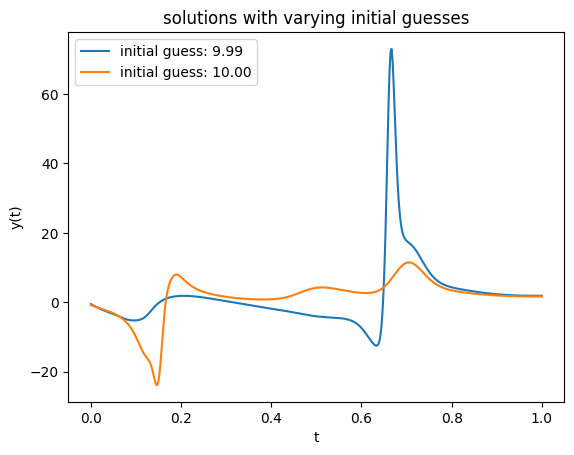

In [14]:
#problem 3: BVP
def ode(t, y):
    return np.array([y[1], (1-y[1])*10*y[0]])

def bc(ya,yb):
    ''' define the boundary conditions '''
    # ya are the initial values
    # yb are the final values
    # each entry of the return array will be set to zero
    return np.array([ya[0] + 1, yb[0] - 1.5])

# element 3: the time domain.
t_steps = 50
t = np.linspace(0,1,t_steps)
# element 4: the initial guess.
y0 = np.ones((2,t_steps))*10

y02 = np.ones((2,t_steps))*9.99
# Solve the system.
sol = solve_bvp(ode, bc, t, y0)
sol2 = solve_bvp(ode, bc, t, y02)


# here we plot sol.x instead of sol.t
plt.plot(sol2.x, sol2.y[0], label="initial guess: 9.99")
plt.plot(sol.x, sol.y[0], label="initial guess: 10.00")
plt.legend()
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('solutions with varying initial guesses')
plt.show()

### Problem 4
Use `solve_ivp` to solve the Four-Wing Attractor as described in equations (1.2), (1.3), and (1.4) where $a=0.2$, $b = 0.01$, and $c = -0.4$. Try this with 3 different initial values and plot (in three dimensions) the 3 corresponding graphs.

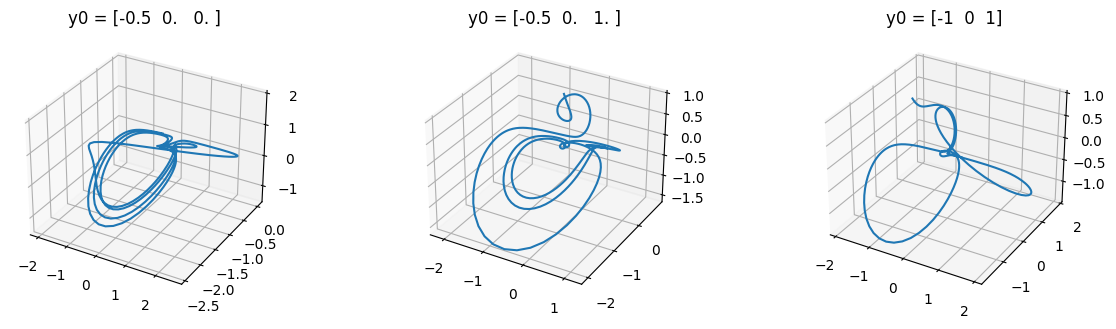

In [7]:
#problem 4: IVP
def ode(t, U):
    x, y, z = U
    return np.array([0.2 * x + y * z, 0.01 * x -0.4 * y - x * z, -z - x * y])

t = (0, 100)
y0_1 = np.array([-0.5, 0, 0])
y0_2 = np.array([-0.5, 0, 1])
t0_3 = np.array([-1, 0, 1])

plt.subplots(figsize=(12, 3), constrained_layout=True)

for i, y0 in enumerate([y0_1, y0_2, t0_3]):
    # solve the system
    # max_step is an optional parameter that controls maximum step size and
    # a smaller value will result in a smoother graph
    sol = solve_ivp(ode, t, y0, max_step=0.1)
    ax = plt.subplot(1, 3, i + 1, projection="3d")

    #plot in 3d, define titles as well
    ax.plot3D(sol.y[0], sol.y[1], sol.y[2])
    ax.set_title(f"y0 = {y0}")

plt.show()

## Problem 5

Write a function that uses `solve_bvp` to find $\psi$ and $E$ that are solutions to the Schroedinger equation for the potential $U(x)=x^2$ and with boundary conditions $\psi(-1)=\psi(1)=0, \psi'(-1)=1$.
By varying your initial guess for $E$, use your function to find solutions for several different values of $E$, and plot them together.

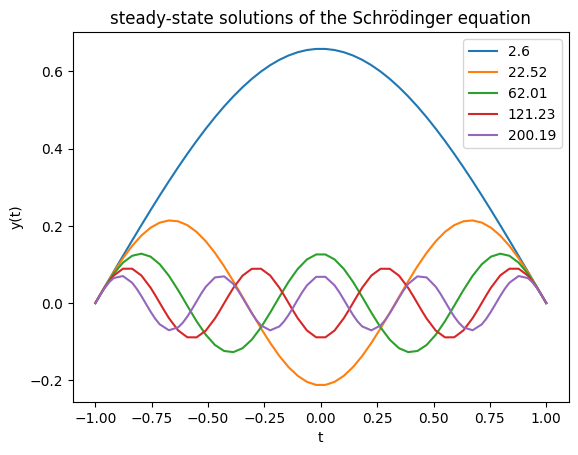

In [4]:
#problem 5
# The ODE function
def ode(t, y, p):
    ''' Defines the ODE system '''
    return np.array([
        y[1],
        y[0]*t**2 - p[0]*y[0]
    ])
# The boundary condition function
def bcs(ya, yb, p):
    ''' Defines the boundary conditions '''
    return np.array([
        ya[0] - 0,
        yb[0] - 0,
        ya[1] - 1
])

# Guess of the solution values
t = np.linspace(-1, 1, 50)
y_guess = np.ones((2,50))

for e in [2.60, 22.52, 62.01, 121.23, 200.19]:
    # Solve
    sol = solve_bvp(ode, bcs, t, y_guess, p=[e])
    plt.plot(sol.x, sol.y[0], label=f"{e}")

plt.title("steady-state solutions of the Schrödinger equation")
plt.legend()
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()